### Installing Dependicies

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import pandas
import sklearn
import pickle
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.tree import DecisionTreeClassifier 
#from sklearn.learning_curve import learning_curve
from sklearn.model_selection import learning_curve, GridSearchCV

Importing the Dataset spam.csv

In [2]:
data = pd.read_csv('./data/spam.csv', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Removing unwanted columns

In [3]:
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v2" : "text", "v1":"label"})

In [4]:
data[1990:2000]

,label,text
1990,ham,HI DARLIN IVE JUST GOT BACK AND I HAD A REALLY...
1991,ham,No other Valentines huh? The proof is on your ...
1992,spam,Free tones Hope you enjoyed your new content. ...
1993,ham,Eh den sat u book e kb liao huh...
1994,ham,Have you been practising your curtsey?
1995,ham,Shall i come to get pickle
1996,ham,Lol boo I was hoping for a laugh
1997,ham,\YEH I AM DEF UP4 SOMETHING SAT
1998,ham,"Well, I have to leave for my class babe ... Yo..."
1999,ham,LMAO where's your fish memory when I need it?


In [5]:
data['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='Count'>

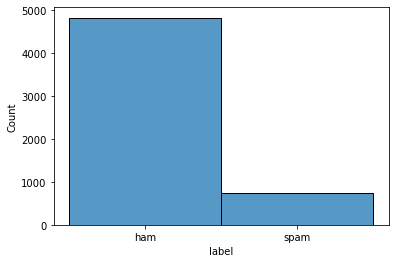

In [6]:
import seaborn as sns
sns.histplot(data=data["label"])

### Some Visualisations

In [7]:
import nltk
nltk.download("punkt")
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gts\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### WordClouds- to see which words are common in SPAM and NOT SPAM mesaages

In [8]:
ham_words = ''
spam_words = ''

In [9]:
ham_words

''

In [10]:
for val in data[data['label'] == 'spam'].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        spam_words = spam_words + words + ' '
        
for val in data[data['label'] == 'ham'].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        ham_words = ham_words + words + ' '

In [11]:
ham_words

"go until jurong point , crazy .. available only in bugis n great world la e buffet ... cine there got amore wat ... ok lar ... joking wif u oni ... u dun say so early hor ... u c already then say ... nah i do n't think he goes to usf , he lives around here though even my brother is not like to speak with me . they treat me like aids patent . as per your request 'melle melle ( oru minnaminunginte nurungu vettam ) ' has been set as your callertune for all callers . press * 9 to copy your friends callertune i 'm gon na be home soon and i do n't want to talk about this stuff anymore tonight , k ? i 've cried enough today . i 've been searching for the right words to thank you for this breather . i promise i wont take your help for granted and will fulfil my promise . you have been wonderful and a blessing at all times . i have a date on sunday with will ! ! oh k ... i 'm watching here : ) eh u remember how 2 spell his name ... yes i did . he v naughty make until i v wet . fine if thatåõs 

In [12]:
spam_wordcloud = WordCloud(width=500, height=300).generate(spam_words)
ham_wordcloud = WordCloud(width=500, height=300).generate(ham_words)

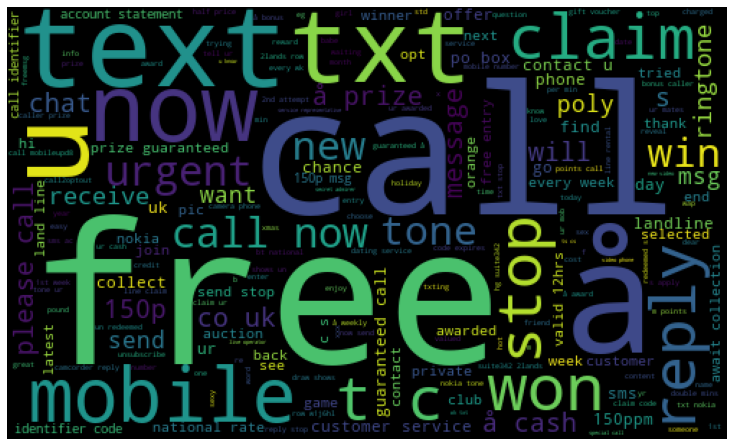

In [13]:
#Spam Word cloud
plt.figure( figsize=(10,8), facecolor='w')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

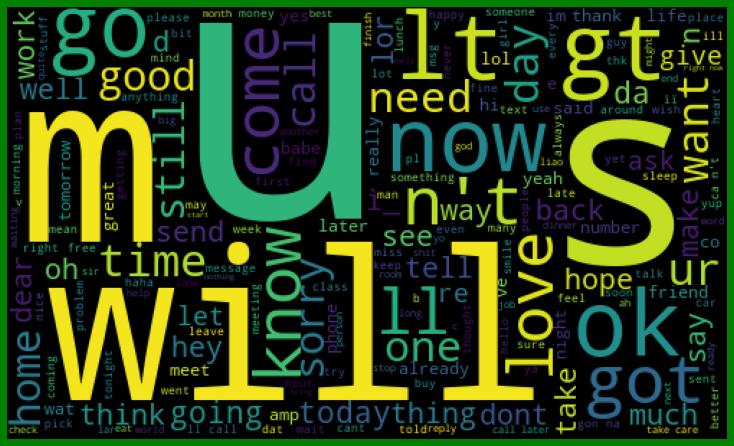

In [14]:
plt.figure( figsize=(10,8), facecolor='g')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [15]:
data = data.replace(['ham','spam'],[0, 1]) 

In [16]:
data['label'].value_counts()

0    4825
1     747
Name: label, dtype: int64

In [17]:
data.head(10)

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


### Removing Stopwords from the messages

In [18]:
import string
def text_process(text):
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    
    return " ".join(text)

In [19]:
data['text'] = data['text'].str.lower()

In [20]:
data['text'] = data['text'].apply(text_process)

In [34]:
data.to_csv(r'preprocess.csv')